In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
lyrics="Juda Hoke Bhi Tu \n Mujhmein Kahi Baaki Hai \n Palkon Mein Banke \n Aansu Tu Chali Aati Hai \n Juda Hoke Bhi \n Waise Zinda Hu Zindagi \n Bin Tere Main \n Dard Hi Dard Baaki \n Raha Hai Seene Mein \n Saans Lena Bhar Hi \n Yaha Jeena Nahi Hain \n Ab Toh Aadat Si \n Hai Mujhko Aaise Jeene Mein \n Juda Hoke Bhi Tu \n Mujhmein Kahi Baaki Hai \n Palkon Mein Banke \n Aansu Tu Chali Aati Hai \n Saath Mere Hain Tu \n Har Pal Shab Ke Andhere Mein \n Paas Mere Hain Tu \n Hardam Ujale Savere Mein \n Dil Se Dhadkan Bhula \n Dena Aasan Nahi Hai \n Ab Toh Aadat Si Hai \n Mujhko Aaise Jeene Mein \n Juda Hoke Bhi Tu Mujhmein Kahi Baaki Hai \n Palkon Mein Banke Aansu Tu Chali Aati Hai \n Ab Toh Aadat Si Hai \n Mujhko Aaise Jeene Mein \n Yeh Jo Yaadein Hai \n Yeh Jo Yaadein Hai \n Sabhi Kaatein Hai \n Katado Inhein \n Ab Toh Aadat \n Si Hai Mujhko"

In [9]:
lyrics=lyrics.split('\n')

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [11]:
token=Tokenizer()
token.fit_on_texts(lyrics)

In [12]:
total_length=len(token.word_index)+1

In [13]:
total_length

64

In [14]:
token.word_index

{'hai': 1,
 'mein': 2,
 'tu': 3,
 'juda': 4,
 'hoke': 5,
 'bhi': 6,
 'baaki': 7,
 'ab': 8,
 'toh': 9,
 'aadat': 10,
 'si': 11,
 'mujhko': 12,
 'mujhmein': 13,
 'kahi': 14,
 'palkon': 15,
 'banke': 16,
 'aansu': 17,
 'chali': 18,
 'aati': 19,
 'hain': 20,
 'aaise': 21,
 'jeene': 22,
 'dard': 23,
 'hi': 24,
 'nahi': 25,
 'mere': 26,
 'yeh': 27,
 'jo': 28,
 'yaadein': 29,
 'waise': 30,
 'zinda': 31,
 'hu': 32,
 'zindagi': 33,
 'bin': 34,
 'tere': 35,
 'main': 36,
 'raha': 37,
 'seene': 38,
 'saans': 39,
 'lena': 40,
 'bhar': 41,
 'yaha': 42,
 'jeena': 43,
 'saath': 44,
 'har': 45,
 'pal': 46,
 'shab': 47,
 'ke': 48,
 'andhere': 49,
 'paas': 50,
 'hardam': 51,
 'ujale': 52,
 'savere': 53,
 'dil': 54,
 'se': 55,
 'dhadkan': 56,
 'bhula': 57,
 'dena': 58,
 'aasan': 59,
 'sabhi': 60,
 'kaatein': 61,
 'katado': 62,
 'inhein': 63}

In [15]:
input_sequence=[]
for line in lyrics:
    sentences_sequence=token.texts_to_sequences([line])[0]
    for i in range(len(sentences_sequence)):
        n_gram_sequences=sentences_sequence[:i+1]
        input_sequence.append(n_gram_sequences)

In [16]:
input_sequence

[[4],
 [4, 5],
 [4, 5, 6],
 [4, 5, 6, 3],
 [13],
 [13, 14],
 [13, 14, 7],
 [13, 14, 7, 1],
 [15],
 [15, 2],
 [15, 2, 16],
 [17],
 [17, 3],
 [17, 3, 18],
 [17, 3, 18, 19],
 [17, 3, 18, 19, 1],
 [4],
 [4, 5],
 [4, 5, 6],
 [30],
 [30, 31],
 [30, 31, 32],
 [30, 31, 32, 33],
 [34],
 [34, 35],
 [34, 35, 36],
 [23],
 [23, 24],
 [23, 24, 23],
 [23, 24, 23, 7],
 [37],
 [37, 1],
 [37, 1, 38],
 [37, 1, 38, 2],
 [39],
 [39, 40],
 [39, 40, 41],
 [39, 40, 41, 24],
 [42],
 [42, 43],
 [42, 43, 25],
 [42, 43, 25, 20],
 [8],
 [8, 9],
 [8, 9, 10],
 [8, 9, 10, 11],
 [1],
 [1, 12],
 [1, 12, 21],
 [1, 12, 21, 22],
 [1, 12, 21, 22, 2],
 [4],
 [4, 5],
 [4, 5, 6],
 [4, 5, 6, 3],
 [13],
 [13, 14],
 [13, 14, 7],
 [13, 14, 7, 1],
 [15],
 [15, 2],
 [15, 2, 16],
 [17],
 [17, 3],
 [17, 3, 18],
 [17, 3, 18, 19],
 [17, 3, 18, 19, 1],
 [44],
 [44, 26],
 [44, 26, 20],
 [44, 26, 20, 3],
 [45],
 [45, 46],
 [45, 46, 47],
 [45, 46, 47, 48],
 [45, 46, 47, 48, 49],
 [45, 46, 47, 48, 49, 2],
 [50],
 [50, 26],
 [50, 26, 20],
 [

In [17]:
# Pad Sequences
from tensorflow.keras.utils import pad_sequences,to_categorical

In [18]:
max_len=max([len(i) for i in lyrics])
max_len

43

In [19]:
sequences=pad_sequences(input_sequence,maxlen=max_len,padding='pre')

In [20]:
sequences

array([[ 0,  0,  0, ...,  0,  0,  4],
       [ 0,  0,  0, ...,  0,  4,  5],
       [ 0,  0,  0, ...,  4,  5,  6],
       ...,
       [ 0,  0,  0, ...,  0,  0, 11],
       [ 0,  0,  0, ...,  0, 11,  1],
       [ 0,  0,  0, ..., 11,  1, 12]])

In [21]:
arrays,labels=sequences[:,:-1],sequences[:,-1]
labels=to_categorical(labels,num_classes=total_length)

In [22]:
# Loading the libraries for model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Bidirectional,Embedding,Dropout,Dense

In [23]:
total_length

64

In [46]:
model=Sequential()
model.add(Embedding(total_length,64,input_length=max_len-1))
model.add(Bidirectional(LSTM(20,return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(90)))
model.add(Dense(total_length,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
history=model.fit(arrays,labels,epochs=300)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.0280 - loss: 4.1582 
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1111 - loss: 4.1209
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0989 - loss: 3.9999
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0985 - loss: 3.9107
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1145 - loss: 3.8206
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1037 - loss: 3.8499
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0842 - loss: 3.8843  
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1102 - loss: 3.8050
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0941 - loss: 3.8370
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1137 - loss: 3.8362
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1198 - loss: 3.7941
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1176 -

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6828 - loss: 1.1453
Epoch 138/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6543 - loss: 1.1947
Epoch 139/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7112 - loss: 1.0543
Epoch 140/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7236 - loss: 0.9854
Epoch 141/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7354 - loss: 1.0929
Epoch 142/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7469 - loss: 0.9436
Epoch 143/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6947 - loss: 1.0389
Epoch 144/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7345 - loss: 0.9629
Epoch 145/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7034 - loss: 1.0366
Epoch 146/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7124 - loss: 0.9535
Epoch 147/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7410 - loss: 0.9364
Epoch 148/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.75

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8121 - loss: 0.7278
Epoch 274/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7674 - loss: 0.8323
Epoch 275/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7778 - loss: 0.7981
Epoch 276/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6240 - loss: 1.4318
Epoch 277/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6002 - loss: 1.2917
Epoch 278/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6432 - loss: 1.1451
Epoch 279/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6924 - loss: 1.0510
Epoch 280/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7701 - loss: 0.8457
Epoch 281/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7701 - loss: 0.9048
Epoch 282/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7531 - loss: 0.9040
Epoch 283/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6986 - loss: 0.9526
Epoch 284/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.72

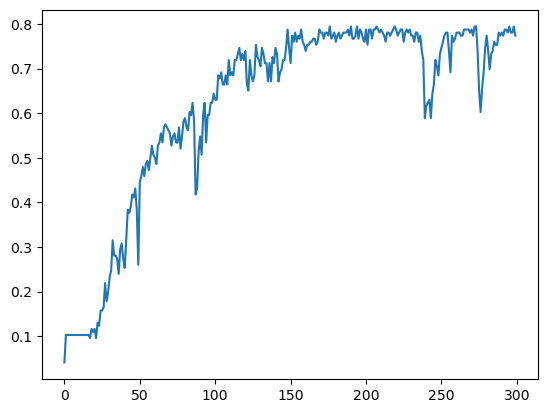

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [49]:
model.save('Model.h5')

In [52]:
import pickle 
pickle.dump(token,open('tokenizer.pkl','wb'))

In [5]:
import pickle
from keras.models import load_model
model = load_model('model.h5')
with open('tokenizer.pkl', 'rb') as x:
    tokenizer = pickle.load(x)
    x.close()

In [25]:
# Testing the model
text='Tu hain kaha'
next_words=50
for _ in range(next_words):
    sentence_sequence=token.texts_to_sequences([text])[0]
    padded=pad_sequences([sentence_sequence],maxlen=max_len-1,padding='pre')
    prediction=np.argmax(model.predict(padded,verbose=0),axis=1)
    output=""
    for word,index in token.word_index.items():
        if prediction==index:
            output=word
            break
        text+=' '+word
print(text)   

Tu hain kaha hai mein hai mein tu juda hoke bhi baaki ab toh aadat si mujhko mujhmein kahi palkon banke aansu chali aati hain aaise
